*Load datasets based from all csv's*

In [ ]:
using CSV
using DataFrames
using Plots
using Flux
using Flux: throttle
using StatsPlots

In [2]:
# load all Listings in to the DataFrame's
cities = ["Amsterdam","Barcelona","CapeTown","Florence","HongKong","Montreal","NewZealand","Stockholm"]
city_center_locations = Dict(
    "Amsterdam" => (52.37403, 4.88969),
    "Barcelona" => (41.38506, 2.17340),
    "CapeTown" => (-33.92487, 18.42406),
    "Florence" => (43.76956, 11.25581),
    "HongKong" => (22.39643, 114.10950),
    "Montreal" => (45.49724, -73.61036),
    "NewZealand" => (-36.84846, 174.76333),
    "Stockholm" => (59.32932, 18.06858)
)

# create a container for the DataFrames with tuples of (city, df)
city_dfs = Dict()
for city in cities
    current_df = CSV.read("../datasets/" * city * "/listings.csv",DataFrame)
    # push the current city and its DataFrame to the container
    city_dfs[city] = current_df
end
    

In [3]:
function get_distance_from_city_center(city_center,x,y)
    return sqrt((x - city_center[1])^2 + (y - city_center[2])^2)
end

get_distance_from_city_center (generic function with 1 method)

In [11]:
# create a new column with the distance from the city center
for city in cities
    city_dfs[city][!,:distance_from_city_center] = zeros(size(city_dfs[city],1))
end
for city in cities
    for row in eachrow(city_dfs[city])
        row.distance_from_city_center = get_distance_from_city_center(city_center_locations[city],row[:latitude],row[:longitude])
    end
end

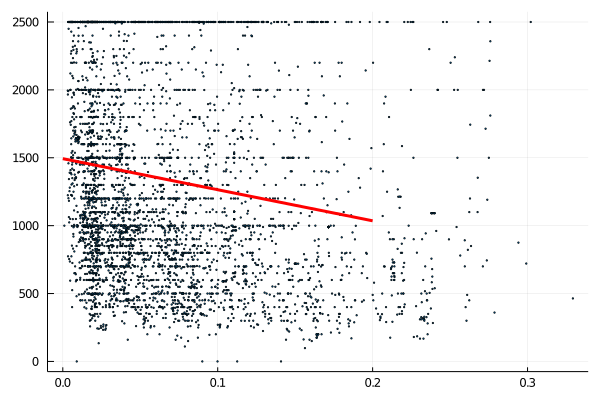

In [47]:
city_to_plot = "Stockholm"

regX = city_dfs[city_to_plot].distance_from_city_center
regY = clamp.(city_dfs[city_to_plot].price,0,5000)
X = hcat(ones(length(regX)),regX)
Y = regY
intercept,slope = inv(X'*X)*(X'*Y)

Plots.scatter(city_dfs[city_to_plot].distance_from_city_center,clamp.(city_dfs[city_to_plot].price,0,2500),legend=false,markersize=1.0,label="data")
plot!((x) -> intercept + slope * x, 0, 0.2, label="fit_exact",linewidth=3,color=:red)


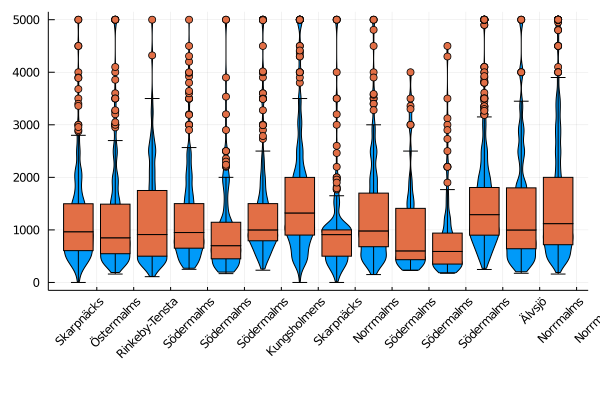

In [48]:
y = rand(100, 4)
violin(city_dfs[city_to_plot].neighbourhood, clamp.(city_dfs[city_to_plot].price,0,5000), legend=false,figsize=(1000,1000),xticks=(1:50, city_dfs[city_to_plot].neighbourhood), xrotation=45)
boxplot!(city_dfs[city_to_plot].neighbourhood, clamp.(city_dfs[city_to_plot].price,0,5000), legend=false,figsize=(1000,1000),xticks=(1:50, city_dfs[city_to_plot].neighbourhood), xrotation=45)

*Select the best listings based on the price / distance from city centre combo*

*Visualize pricing based on the season to book*

*Compare multiple Cities on price / distance ration*